In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
movies_df = pd.read_csv('movies.csv')
raitings_df = pd.read_csv('ratings.csv') 
tags_df = pd.read_csv('tags.csv')

# Movie table analysis

In [4]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movies_df.head().T

,0,1,2,3,4
movieId,1,2,3,4,5
title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995)
genres,Adventure|Animation|Children|Comedy|Fantasy,Adventure|Children|Fantasy,Comedy|Romance,Comedy|Drama|Romance,Comedy


In [6]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [7]:
movies_df.shape

(9742, 3)

In [8]:
movies_df.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [9]:
movies_df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [10]:
movies_df.nunique()

movieId    9742
title      9737
genres      951
dtype: int64

In [11]:
movies_df['genres'].value_counts()

genres
Drama                                        1053
Comedy                                        946
Comedy|Drama                                  435
Comedy|Romance                                363
Drama|Romance                                 349
                                             ... 
Children|Drama|Musical                          1
Adventure|Drama|Horror|Mystery|Thriller         1
Adventure|Children|Comedy|Fantasy|Mystery       1
Adventure|Animation|Children|Western            1
Comedy|Mystery|Romance|Thriller                 1
Name: count, Length: 951, dtype: int64

In [12]:
duplicated_titles = movies_df[movies_df.duplicated('title', keep = False)]
duplicated_titles

,movieId,title,genres
650,838,Emma (1996),Comedy|Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller


In [13]:
duplicated_titles['title'].value_counts()

title
Emma (1996)                               2
Saturn 3 (1980)                           2
Confessions of a Dangerous Mind (2002)    2
Eros (2004)                               2
War of the Worlds (2005)                  2
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 20 Most Frequent Genres')

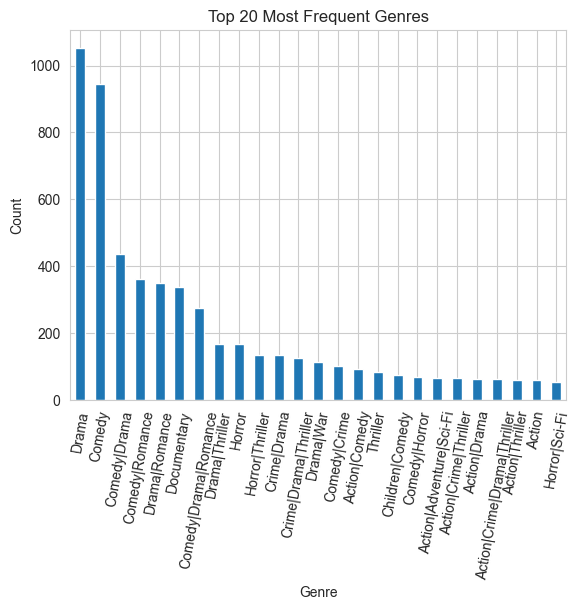

In [14]:
genres_count = movies_df['genres'].value_counts().head(25)
genres_count.plot(kind='bar')
plt.xticks(rotation = 80)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 20 Most Frequent Genres')

In [15]:
len(movies_df[movies_df.genres=='(no genres listed)'])

34

In [16]:
genre_counter = Counter()
for genre in movies_df.genres:
    genres = genre.split('|')
    genre_counter.update(genres)

genre_count = dict(genre_counter)
genre_count

{'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Fantasy': 779,
 'Romance': 1596,
 'Drama': 4361,
 'Action': 1828,
 'Crime': 1199,
 'Thriller': 1894,
 'Horror': 978,
 'Mystery': 573,
 'Sci-Fi': 980,
 'War': 382,
 'Musical': 334,
 'Documentary': 440,
 'IMAX': 158,
 'Western': 167,
 'Film-Noir': 87,
 '(no genres listed)': 34}

In [17]:
len(genre_count)

20

Text(0.5, 1.0, 'Number of movies in each genre')

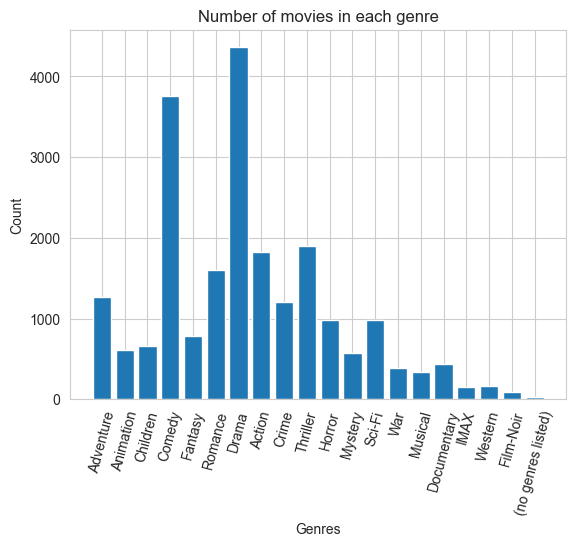

In [18]:
plt.bar(genre_count.keys(), genre_count.values())
plt.xticks(rotation = 75)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Number of movies in each genre')

In [25]:
encoded_genres = movies_df.genres.str.get_dummies(sep='|')
movies_encoded_df = pd.concat([movies_df, encoded_genres], axis = 1)
del movies_encoded_df['genres']

In [29]:
movies_encoded_df.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
movies_encoded_df.to_csv('movies_encoded.csv', index = False)